=== Start Page 1: 2 blocks ===
=== End Page 1: 2 blocks ===

=== Start Page 2: 0 blocks ===
=== End Page 2: 0 blocks ===

=== Start Page 3: 0 blocks ===
=== End Page 3: 0 blocks ===

=== Start Page 4: 1 blocks ===
=== End Page 4: 1 blocks ===

=== Start Page 5: 0 blocks ===
=== End Page 5: 0 blocks ===

=== Start Page 6: 0 blocks ===
=== End Page 6: 0 blocks ===

=== Start Page 7: 0 blocks ===
=== End Page 7: 0 blocks ===

=== Start Page 8: 0 blocks ===
=== End Page 8: 0 blocks ===

=== Start Page 9: 0 blocks ===
=== End Page 9: 0 blocks ===

=== Start Page 10: 0 blocks ===
=== End Page 10: 0 blocks ===

=== Start Page 11: 1 blocks ===
=== End Page 11: 1 blocks ===

=== Start Page 12: 0 blocks ===
=== End Page 12: 0 blocks ===

=== Start Page 13: 1 blocks ===
=== End Page 13: 1 blocks ===

=== Start Page 14: 0 blocks ===
=== End Page 14: 0 blocks ===

=== Start Page 15: 1 blocks ===
=== End Page 15: 1 blocks ===

=== Start Page 16: 0 blocks ===
=== End Page 16: 0 blocks ===

=== Start 

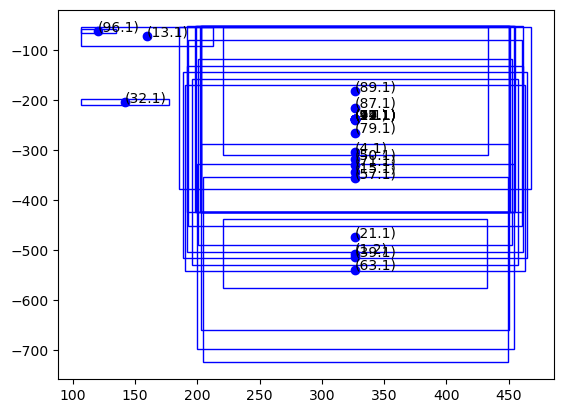

In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import fitz
from pathlib import Path
from itertools import islice
from categorizer import PDFTextBlockCategorizer
import chardet
import re


class PDFExtractor:
    # pdf_root = "..."

    def __init__(self, BookPath):
        # pdf_filename = "***.pdf"
        
        self.pdf_fullpath = BookPath
        self.pdf_doc = fitz.open(self.pdf_fullpath)

    def calc_rect_center(self, rect, reverse_y=False):
        if reverse_y:
            x0, y0, x1, y1 = rect[0], -rect[1], rect[2], -rect[3]
        else:
            x0, y0, x1, y1 = rect

        x_center = (x0 + x1) / 2
        y_center = (y0 + y1) / 2
        return (x_center, y_center)

    def extract_all_text_blocks(self):
        # * https://pymupdf.readthedocs.io/en/latest/textpage.html#TextPage.extractBLOCKS

        rect_centers = []
        rects = []
        visual_label_texts = []
        categorize_vectors = []

        page_labels = {}

        blockTypes = []

        selected_blocks = []

        for page_idx, page in islice(enumerate(self.pdf_doc), len(self.pdf_doc)):
            blocks = page.get_text("blocks")


            page_cnt = page_idx + 1

            max_text_length = 0
            max_text_block = None


            print(f"=== Start Page {page_cnt}: {len(blocks)} blocks ===")
            
            block_cnt = 0
            for block in blocks:
                if not block[4].strip():
                    blocks.remove(block)
                    continue
                
                #print(block)
                block_rect = block[:4]  # (x0,y0,x1,y1)
                x0, y0, x1, y1 = block_rect
                rects.append(block_rect)

                block_text = block[4]

               


                

                


                block_num = block[5]
                block_cnt = block_num + 1

                rect_center = self.calc_rect_center(block_rect, reverse_y=True)
                rect_centers.append(rect_center)
                visual_label_text = f"({page_cnt}.{block_cnt})"
                visual_label_texts.append(visual_label_text)

                
                block_type = "text" if block[6] == 0 else "image"
                #print(block)
                # if block[6] == 0:
                #     block_type = "text"
                # else:
                #     block_type = "image"
                #     continue

                blockTypes.append(block[6])

                
                categorize_vectors.append((*block_rect, block_text))
                #print(categorize_vectors)

            
        
            print(f"=== End Page {page_cnt}: {len(blocks)} blocks ===\n")

       
        
        categorizer = PDFTextBlockCategorizer(categorize_vectors)
        categorizer.run()


        

        

        for i in range(len(categorize_vectors)):
            
           

            try:
                integer_value = int(categorize_vectors[i][4])
                continue
            except ValueError:
                if categorizer.labels[i] == 0 and blockTypes[i] == 0: 
                    
                    selected_blocks.append(categorize_vectors[i])
                    #print(categorize_vectors[i][4])
                else:
                    continue
             
        def preprocess_text(text):
            cleaned_text = re.sub(r'�', ' ', text)
            return cleaned_text


        #Saving the File Manually

        BookName = os.path.basename(self.pdf_fullpath)
        TextFilePath = f"{BookName}.txt"
        with open(TextFilePath, 'w') as file:

            for i in selected_blocks:
                #x = preprocess_text(i[4])
                x = i[4]
                print(x)
                file.write(x + '\n')

        
            
           


        fig, ax = plt.subplots()
        colors = ["b", "r", "g", "c", "m", "y", "k"]

        for i, rect_center in enumerate(rect_centers):
            label_idx = categorizer.labels[i]
            color = colors[label_idx]
            x0, y0, x1, y1 = rects[i]
            rect = Rectangle((x0, -y0), x1 - x0, -y1 + y0, fill=False, edgecolor=color)
            ax.add_patch(rect)
            x, y = rect_center
            plt.scatter(x, y, color=color)
            plt.annotate(visual_label_texts[i], rect_center)
        plt.show()



        

    def run(self):
        self.extract_all_text_blocks()




if __name__ == "__main__":
    pdf_extractor = PDFExtractor("PDFs\Coraline.pdf")
    pdf_extractor.run()